# Sales Data Analysis & Visualization Notebook

This notebook analyzes the **Sales** dataset (9,994 entries, 11 columns) through four main analysis pillars:

1. **Exploratory Overview**
2. **Regional & Geographic Insights**
3. **Product & Category Performance**
4. **Promotion & Temporal Dynamics**

Each section poses clear questions, runs code with pandas, Matplotlib, and Seaborn, and provides interpretation of results.


In [1]:
# 0. Import Libraries and Load Data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")
palette_color = sns.color_palette('deep')[0]
df = pd.read_csv('sales_data.csv')  # adjust filename accordingly

df.head()

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State
0,OD1,Harish,Oil & Masala,Masalas,Vellore,11-08-2017,North,1254,0.12,401.28,Tamil Nadu
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,11-08-2017,South,749,0.18,149.80,Tamil Nadu
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,06-12-2017,West,2360,0.21,165.20,Tamil Nadu
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,10-11-2016,South,896,0.25,89.60,Tamil Nadu
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,10-11-2016,South,2355,0.26,918.45,Tamil Nadu



---

## 1. Exploratory Overview

### Q1: What is the overall distribution of **Profit** values? Is there any outliers?

In [14]:
profit_stats = df['Profit'].describe()
print(profit_stats)

count    9994.000000
mean      374.937082
std       239.932881
min        25.250000
25%       180.022500
50%       320.780000
75%       525.627500
max      1120.950000
Name: Profit, dtype: float64


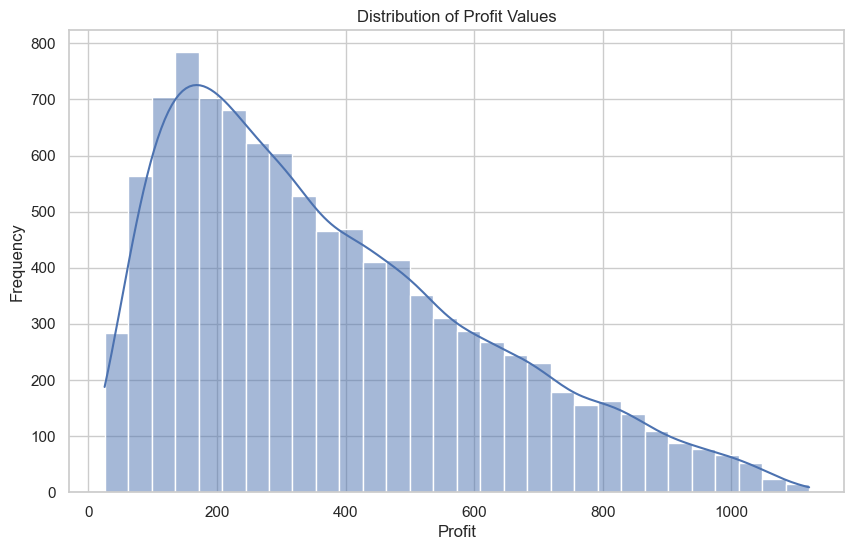

In [12]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Profit'], bins=30, color=palette_color, kde=True)
plt.title('Distribution of Profit Values')
plt.xlabel('Profit')
plt.ylabel('Frequency')
plt.show()

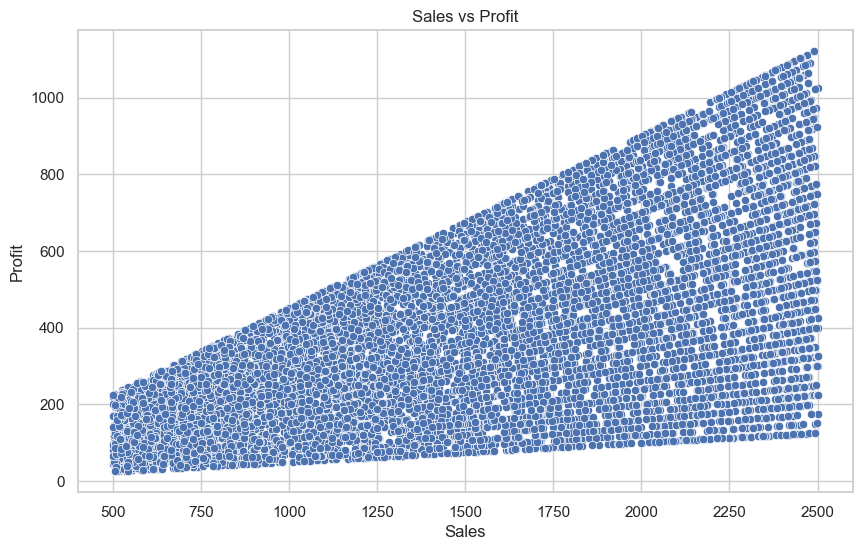

In [2]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Sales', y='Profit', data=df)
plt.title('Sales vs Profit')
plt.xlabel('Sales')
plt.ylabel('Profit')
plt.show()

Yes

### Q2: What is the relationship between **Sales** and **Profit** per order?

    Region  Average_Sales  Average_Profit
3    South    1507.387894      385.153113
4     West    1498.202623      372.152548
0  Central    1492.964270      368.836350
1     East    1491.702247      377.228083
2    North    1254.000000      401.280000


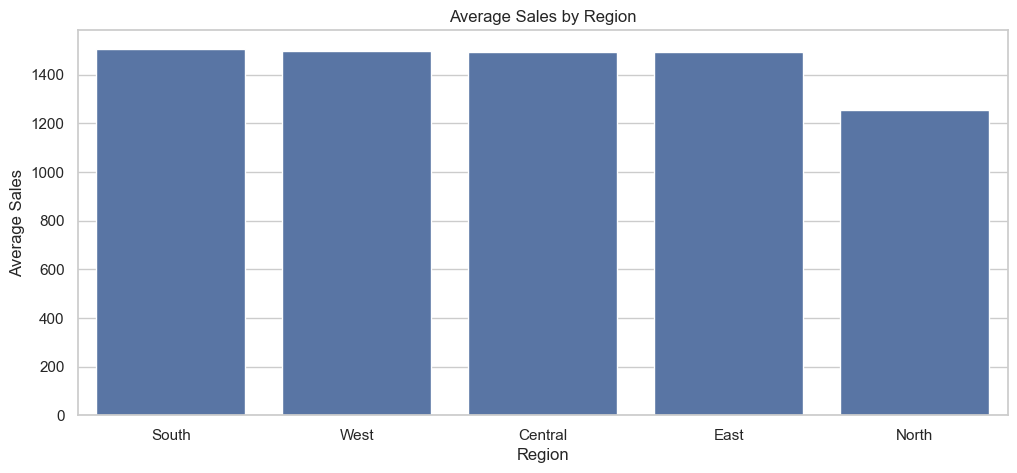

In [3]:
region_perf = (
    df.groupby('Region', as_index=False)
      .agg(Average_Sales=('Sales','mean'), Average_Profit=('Profit','mean'))
      .sort_values('Average_Sales', ascending=False)
)
print(region_perf)

plt.figure(figsize=(12,5))
sns.barplot(x='Region', y='Average_Sales', data=region_perf, color=palette_color)
plt.title('Average Sales by Region')
plt.ylabel('Average Sales')
plt.show()


## 2. Regional & Geographic Insights

### Q3a: Which **Region** drives the highest average **sales**?

In [37]:
avg_sales_by_region = (df.groupby('Region', as_index=False)
                   .agg(Avg_sales=('Sales','mean'))
                   .sort_values('Avg_sales', ascending=False)
)

avg_sales_by_region

,Region,Avg_sales
3,South,1507.387894
4,West,1498.202623
0,Central,1492.964270
1,East,1491.702247
2,North,1254.000000


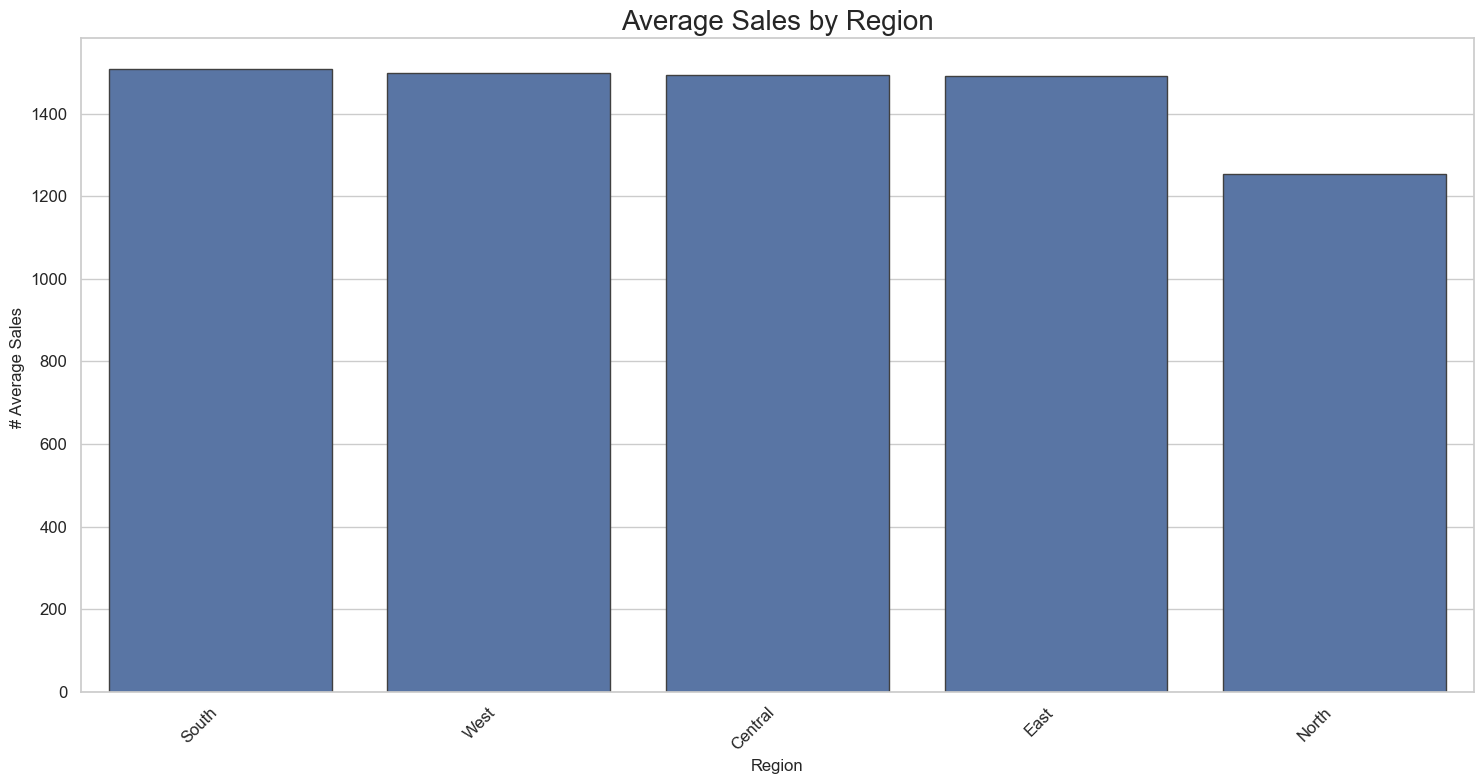

In [43]:
plt.figure(figsize=(15,8))
sns.barplot(data=avg_sales_by_region, x='Region', y='Avg_sales',
                 color=palette_color, edgecolor='0.25')
plt.title('Average Sales by Region', fontsize=20)
plt.ylabel('# Average Sales ', fontsize=12)
plt.xlabel('Region', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

### Q3b: Which **Region** drives the highest average **profit**?

In [44]:
avg_profit_by_region = (
    df.groupby('Region', as_index=False)
    .agg(Avg_Profit=('Profit', 'mean'))
    .sort_values('Avg_Profit', ascending=False)
)

avg_profit_by_region

,Region,Avg_Profit
2,North,401.280000
3,South,385.153113
1,East,377.228083
4,West,372.152548
0,Central,368.836350


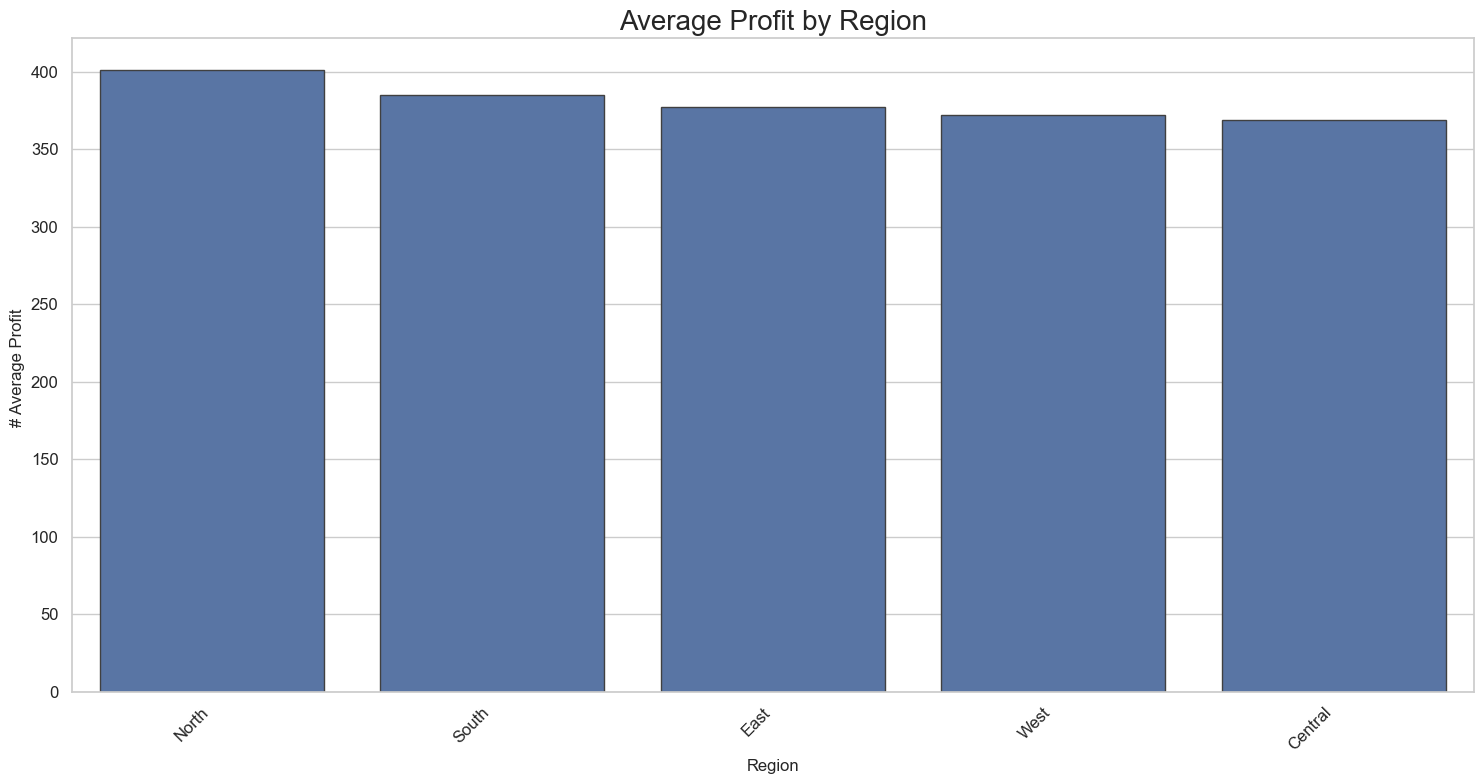

In [46]:
plt.figure(figsize=(15,8))
sns.barplot(data=avg_profit_by_region, x='Region', y='Avg_Profit',
                 color=palette_color, edgecolor='0.25')
plt.title('Average Profit by Region', fontsize=20)
plt.ylabel('# Average Profit ', fontsize=12)
plt.xlabel('Region', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

### Q4a: Top Cities in West Region: Which cities in the **West** region generate the most total sales?  

In [55]:
west_sales = (
    df[df['Region'] == 'West']
    .groupby('City', as_index=False)
    .agg(Total_Sales=('Sales', 'sum'))
    .sort_values('Total_Sales', ascending=False)
    .head(3)

)

west_sales.head()

,City,Total_Sales
0,Bodi,247873
17,Tenkasi,225701
21,Vellore,225617


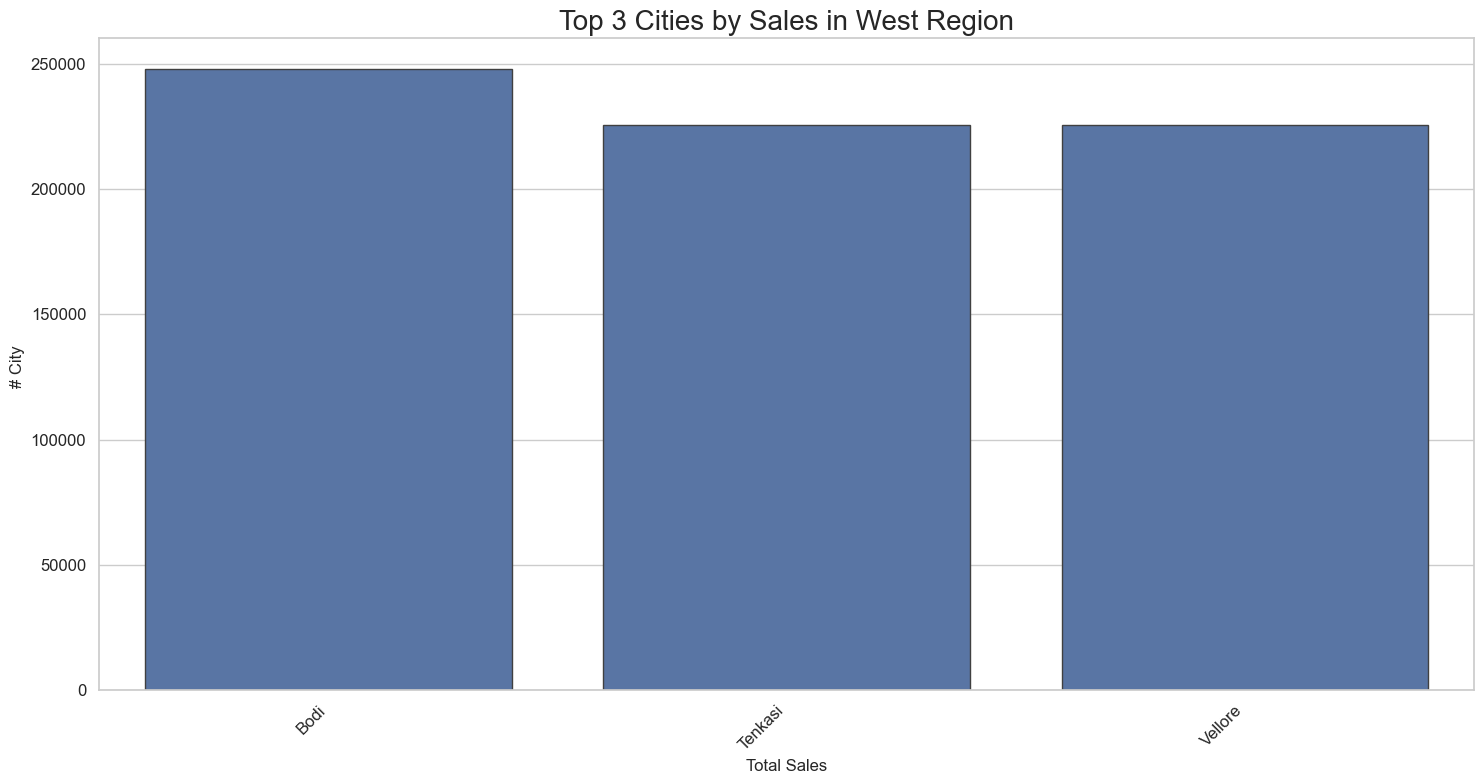

In [57]:
plt.figure(figsize=(15,8))
sns.barplot(data=west_sales, x='City', y='Total_Sales',
                 color=palette_color, edgecolor='0.25')
plt.title('Top 3 Cities by Sales in West Region', fontsize=20)
plt.ylabel('# City ', fontsize=12)
plt.xlabel('Total Sales', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

### Q4b: Top Cities in Central Region: Which cities in the **Central** region generate the most total sales?  

In [58]:
central_sales = (
    df[df['Region'] == 'Central'] 
    .groupby('City', as_index=False)  
    .agg(Total_Sales=('Sales', 'sum'))  
    .sort_values('Total_Sales', ascending=False)  
    .head(3)  
)
central_sales

,City,Total_Sales
6,Kanyakumari,171409
8,Krishnagiri,170683
21,Vellore,165525


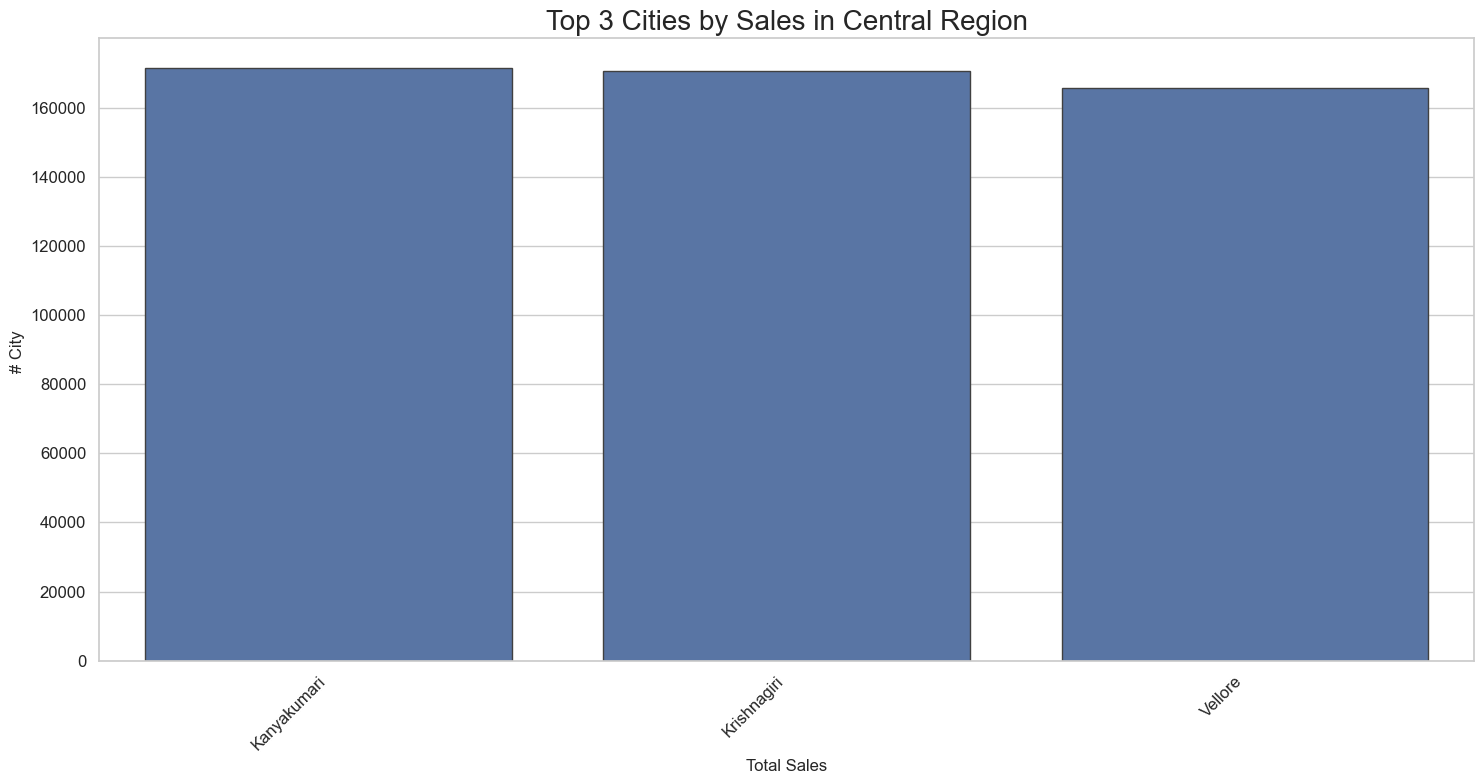

In [63]:
plt.figure(figsize=(15,8))
sns.barplot(data=central_sales, x='City', y='Total_Sales',
                 color=palette_color, edgecolor='0.25')
plt.title('Top 3 Cities by Sales in Central Region', fontsize=20)
plt.ylabel('# City ', fontsize=12)
plt.xlabel('Total Sales', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

### Q4c: Top Cities in East Region: Which cities in the **East** region generate the most total sales?  

In [65]:
east_sales = (
    df[df['Region'] == 'East'] 
    .groupby('City', as_index=False)  
    .agg(Total_Sales=('Sales', 'sum'))  
    .sort_values('Total_Sales', ascending=False)  
    .head(3)  
)
east_sales

,City,Total_Sales
16,Salem,217467
6,Kanyakumari,209930
3,Cumbum,207283


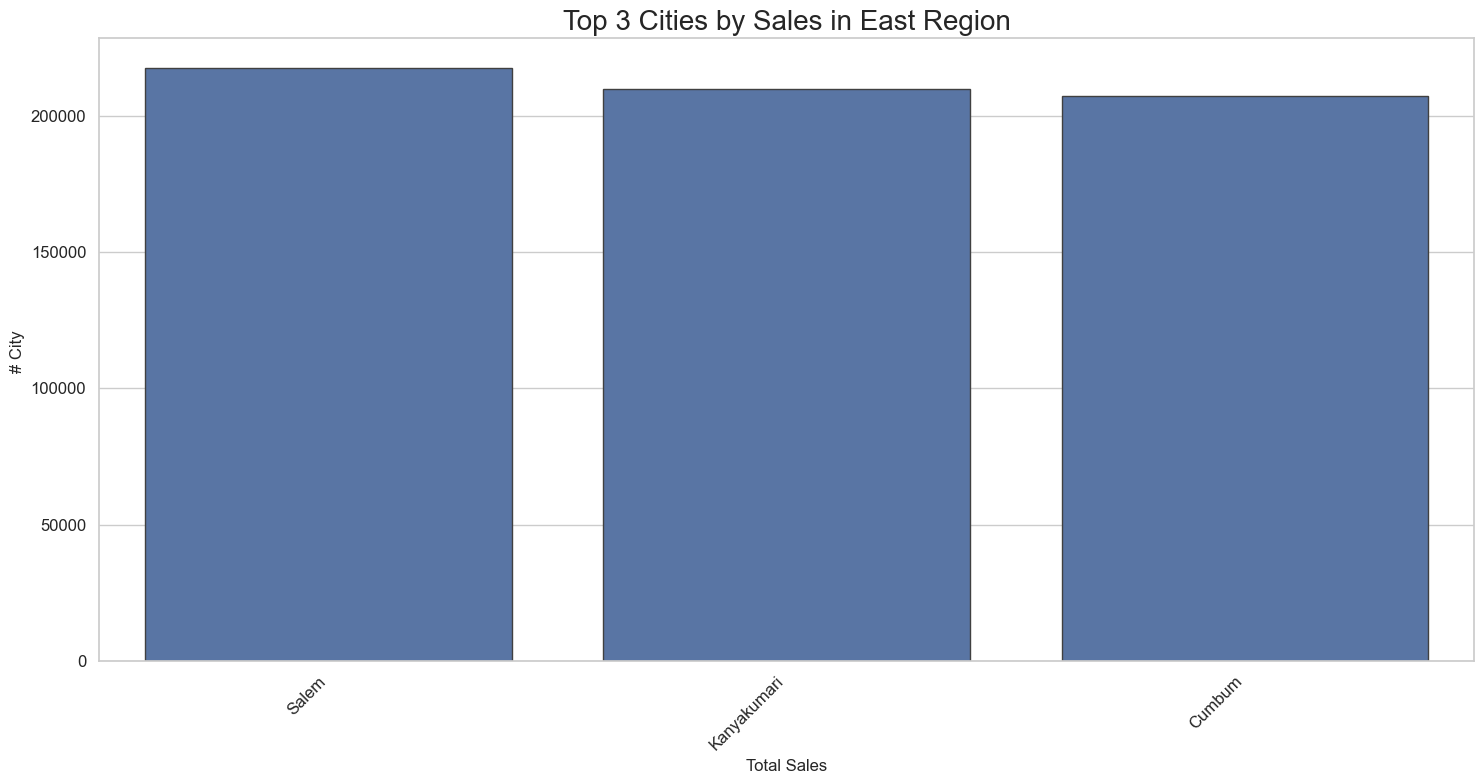

In [67]:
plt.figure(figsize=(15,8))
sns.barplot(data=east_sales, x='City', y='Total_Sales',
                 color=palette_color, edgecolor='0.25')
plt.title('Top 3 Cities by Sales in East Region', fontsize=20)
plt.ylabel('# City ', fontsize=12)
plt.xlabel('Total Sales', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

## 3. Product & Category Performance

### Q5a: Which **Category** contributes the most to total sales?

In [68]:
category_sales = (
    df.groupby('Category', as_index=False)
    .agg(Total_Sales=('Sales', 'sum'))
    .sort_values('Total_Sales', ascending=False)
)

category_sales

,Category,Total_Sales
2,"Eggs, Meat & Fish",2267401
6,Snacks,2237546
3,Food Grains,2115272
0,Bakery,2112281
4,Fruits & Veggies,2100727
1,Beverages,2085313
5,Oil & Masala,2038442


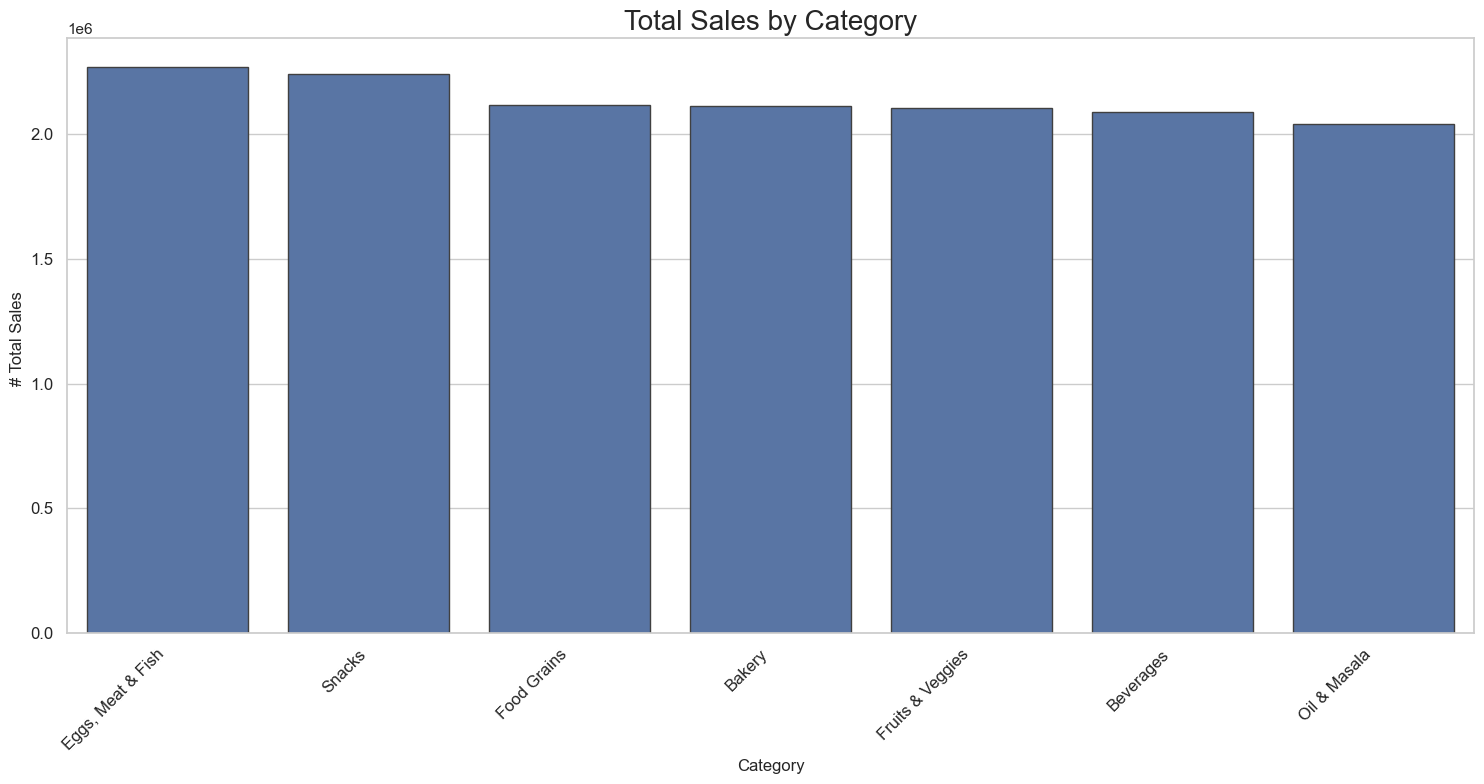

In [69]:
plt.figure(figsize=(15,8))
sns.barplot(data=category_sales, x='Category', y='Total_Sales',
                 color=palette_color, edgecolor='0.25')
plt.title('Total Sales by Category', fontsize=20)
plt.ylabel('# Total Sales ', fontsize=12)
plt.xlabel('Category', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

### Q5b: Which **Category** contributes the most to total profit?

In [70]:
category_profit = (
    df.groupby('Category', as_index=False)
    .agg(Total_Profit=('Profit', 'sum'))
    .sort_values('Total_Profit', ascending=False)
)

category_profit

,Category,Total_Profit
6,Snacks,568178.85
2,"Eggs, Meat & Fish",567357.22
4,Fruits & Veggies,530400.38
3,Food Grains,529162.64
0,Bakery,528521.06
1,Beverages,525605.76
5,Oil & Masala,497895.29


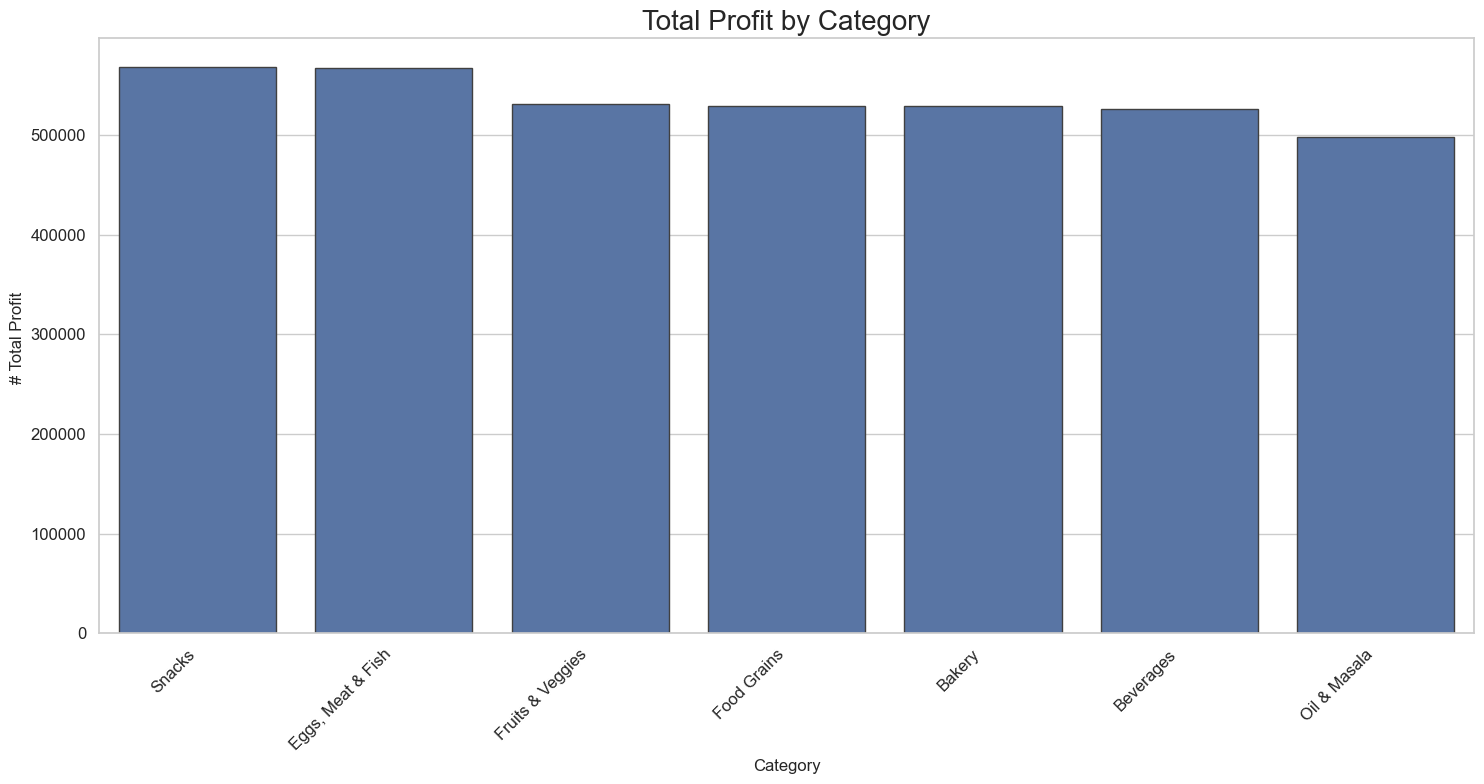

In [78]:
plt.figure(figsize=(15,8))
sns.barplot(data=category_profit, x='Category', y='Total_Profit',
                 color=palette_color, edgecolor='0.25')
plt.title('Total Profit by Category', fontsize=20)
plt.ylabel('# Total Profit ', fontsize=12)
plt.xlabel('Category', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

### Q6: What are the top 5 **Sub-Categories** by total sales?

In [75]:
sub_category_sales = (
    df.groupby('Sub Category', as_index=False)
    .agg(Total_Sales=('Sales', 'sum'))
    .sort_values('Total_Sales', ascending=False)
    .head(5)
)

sub_category_sales

,Sub Category,Total_Sales
13,Health Drinks,1051439
21,Soft Drinks,1033874
6,Cookies,768213
2,Breads & Buns,742586
16,Noodles,735435


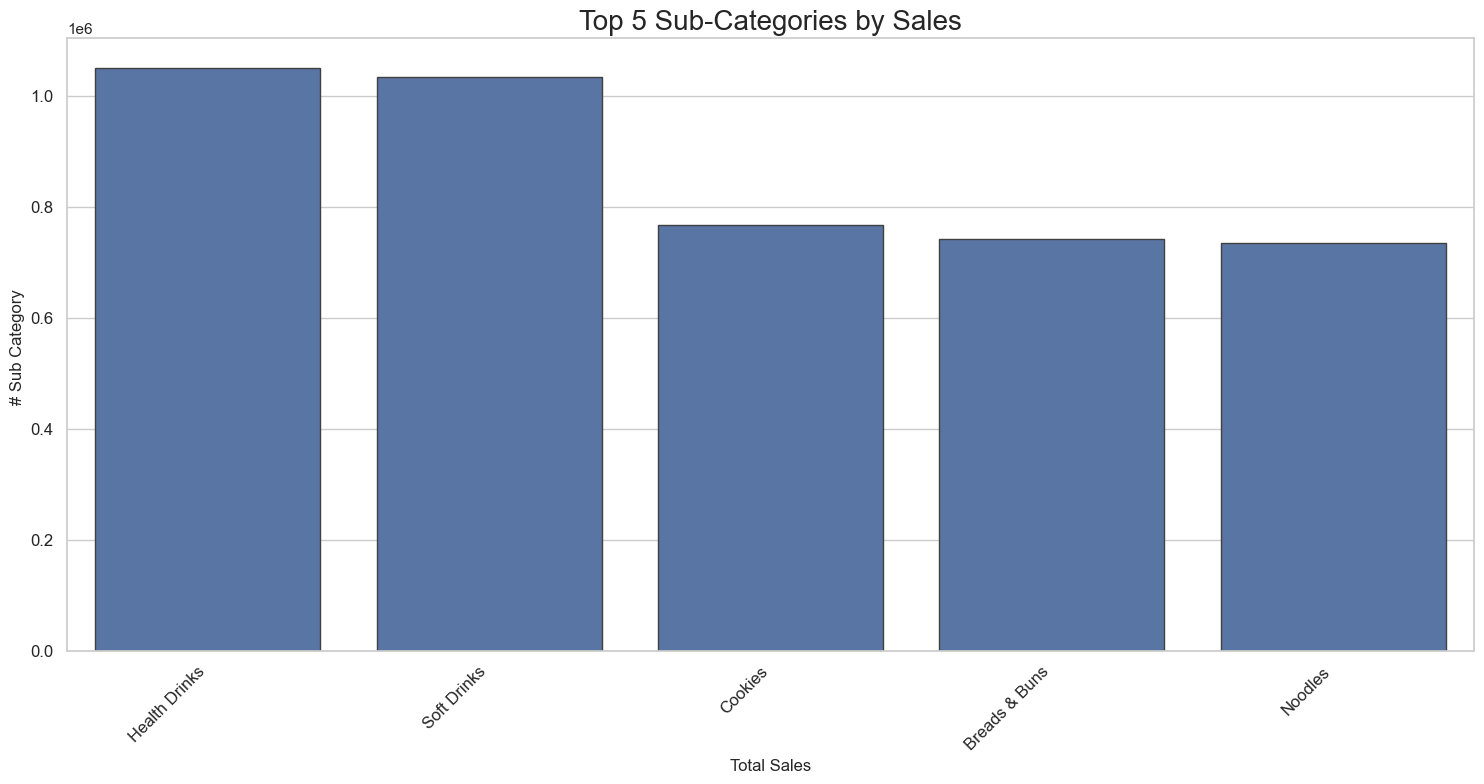

In [80]:
plt.figure(figsize=(15,8))
sns.barplot(data=sub_category_sales, x='Sub Category', y='Total_Sales',
                 color=palette_color, edgecolor='0.25')
plt.title('Top 5 Sub-Categories by Sales', fontsize=20)
plt.ylabel('# Sub Category ', fontsize=12)
plt.xlabel('Total Sales', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

## 4. Promotion & Temporal Dynamics

### Q7: How do **discount brackets** impact average profit?

In [86]:
# Define conditions and corresponding choices
conditions = [
    (df['Discount'] <= 0.1), 
    (df['Discount'] > 0.1) & (df['Discount'] <= 0.2),
    (df['Discount'] > 0.2) & (df['Discount'] <= 0.3),
    (df['Discount'] > 0.3)
]

choices = ['<=10%', '10-20%', '20-30%', '>30%']

# Create new column 'Discount_Category' based on conditions
df['Discount_Category'] = np.select(conditions, choices, default='Other')
df.head()

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State,Discount_Category
0,OD1,Harish,Oil & Masala,Masalas,Vellore,11-08-2017,North,1254,0.12,401.28,Tamil Nadu,10-20%
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,11-08-2017,South,749,0.18,149.80,Tamil Nadu,10-20%
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,06-12-2017,West,2360,0.21,165.20,Tamil Nadu,20-30%
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,10-11-2016,South,896,0.25,89.60,Tamil Nadu,20-30%
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,10-11-2016,South,2355,0.26,918.45,Tamil Nadu,20-30%


In [101]:
discount_profit = (
    df.groupby('Discount_Category', as_index=False)
    .agg(
        Avg_Profit=('Profit', 'mean'),
    )
    .sort_values('Avg_Profit', ascending=False)
)

discount_profit

,Discount_Category,Avg_Profit
1,20-30%,376.715091
0,10-20%,375.145027
3,>30%,373.387638
2,<=10%,361.888415


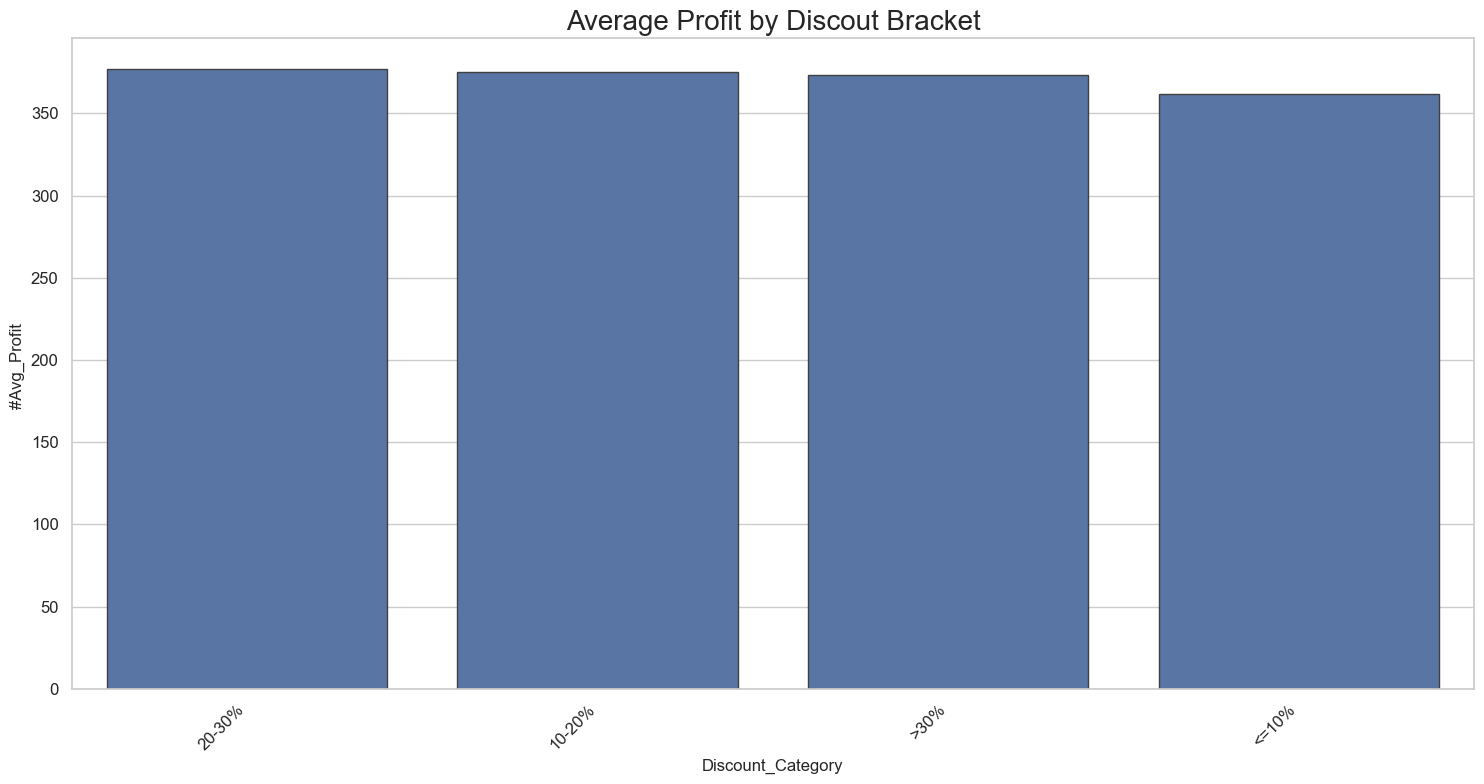

In [102]:
plt.figure(figsize=(15,8))
sns.barplot(data=discount_profit, x='Discount_Category', y='Avg_Profit',
                 color=palette_color, edgecolor='0.25')
plt.title('Average Profit by Discout Bracket', fontsize=20)
plt.ylabel('#Avg_Profit ', fontsize=12)
plt.xlabel('Discount_Category', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

### Q8: How do sales and profit **trend monthly**?

In [105]:
# Convert 'Order Date' with proper parsing
df['Order Date'] = pd.to_datetime(df['Order Date'], format='mixed', dayfirst=True)

# Monthly aggregation
monthly_sales = (
    df.resample('M', on='Order Date')
    .agg(Total_Sales=('Sales', 'sum'), Total_Profit=('Profit', 'sum'))
    .reset_index()
)

print(monthly_sales.head())


  Order Date  Total_Sales  Total_Profit
0 2015-01-31       203014      54689.18
1 2015-02-28       120444      32737.87
2 2015-03-31       260072      66217.50
3 2015-04-30       176187      46030.20
4 2015-05-31       218740      50899.84


/var/folders/bh/3yn_1rsd3fn2j2cnydsmxnz40000gn/T/ipykernel_2664/573813090.py:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df.resample('M', on='Order Date')


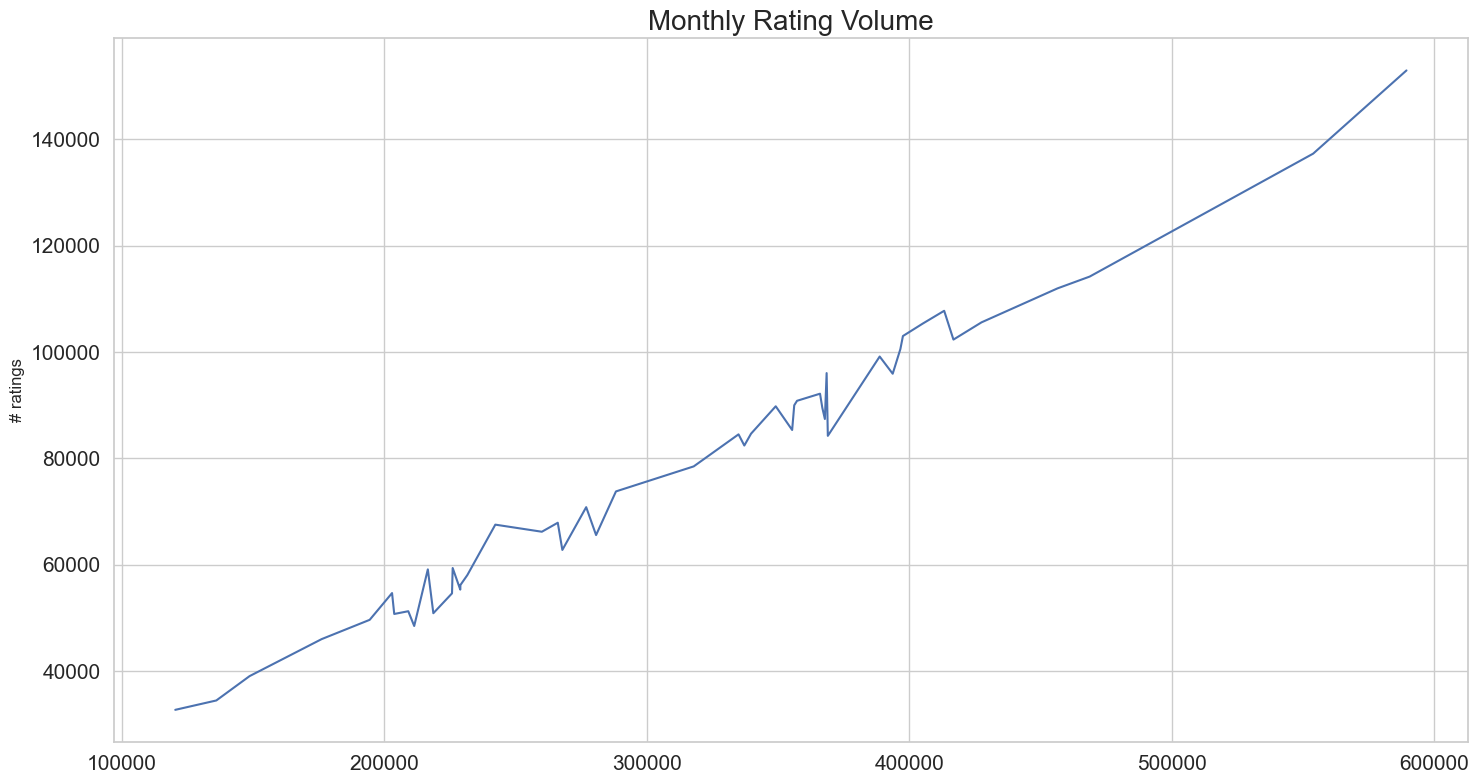

In [114]:
plt.figure(figsize=(15,8))
sns.lineplot(data=monthly_sales, x='Total_Sales', y='Total_Profit', color=palette_color)
plt.title('Monthly Rating Volume', fontsize=20)
plt.xlabel('', fontsize=12)
plt.ylabel('# ratings', fontsize=12)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.tight_layout()
plt.show()


*End of Sales Analysis Notebook.*